In [1]:
import sys
import os
sys.path.append('../')

In [2]:
import torch
from torch import nn
import numpy as np
import dataset
import importlib
import matplotlib.pyplot as plt

In [3]:
import dataset
importlib.reload(dataset)

<module 'dataset' from 'g:\\Dev\\AI\\Projects\\ImageGeneration\\dataset.py'>

In [4]:
dataset = dataset.AllVae()
loader = torch.utils.data.DataLoader(dataset, batch_size=16, shuffle=True)

In [4]:
class SmallAutoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 128, 3, 1, 1),  # 64
            nn.LeakyReLU(),
            nn.MaxPool2d(2, 2), # 32
            nn.Conv2d(128, 256, 3, 1, 1),  
            nn.LeakyReLU(),
            nn.MaxPool2d(2, 2), # 16
            nn.Conv2d(256, 256, 3, 1, 1),  
            nn.LeakyReLU(),
            nn.MaxPool2d(2, 2), # 8
            nn.Flatten(),
            nn.Linear(256*8*8, 2),
            nn.LeakyReLU(),
        )

        self.linear_before_decoder = nn.Sequential(
            nn.Linear(2, 256*8*8),
            nn.LeakyReLU(),
        )

        self.decoder = nn.Sequential(
            nn.Conv2d(256, 256, 3, 1, 1),
            nn.LeakyReLU(),
            nn.ConvTranspose2d(256, 256, 2, 2), # 16
            nn.Conv2d(256, 128, 3, 1, 1),
            nn.LeakyReLU(),
            nn.ConvTranspose2d(128, 128, 2, 2), # 32
            nn.Conv2d(128, 64, 3, 1, 1),
            nn.LeakyReLU(),
            nn.ConvTranspose2d(64, 64, 2, 2), # 64
            nn.Conv2d(64, 32, 3, 1, 1),
            nn.LeakyReLU(),
            nn.Conv2d(32, 3, 3, 1, 1),
            nn.LeakyReLU(),
        )
    
    def forward(self, x):
        x = self.encoder(x)
        x = self.linear_before_decoder(x)
        x = x.view(x.size(0), 256, 8, 8)
        return self.decoder(x)

In [5]:
class Autoencoder(nn.Module):
    def __init__(self, multiplier):
        super().__init__()
    
        self.multiplier = multiplier 


        self.encoder = nn.Sequential(
            nn.Conv2d(3, 32*multiplier, 3, 1, 1),  # 64
            nn.LeakyReLU(),
            nn.Conv2d(32*multiplier, 32*multiplier, 3, 1, 1),  
            nn.LeakyReLU(),
            nn.MaxPool2d(2, 2), # 32
            nn.Conv2d(32*multiplier, 64*multiplier, 3, 1, 1),  
            nn.LeakyReLU(),
            nn.MaxPool2d(2, 2), # 16
            nn.Conv2d(64*multiplier, 64*multiplier, 3, 1, 1),  
            nn.LeakyReLU(),
            nn.MaxPool2d(2, 2), # 8
            nn.Conv2d(64*multiplier, 32*multiplier, 3, 1, 1),  
            nn.LeakyReLU(),
            nn.Conv2d(32*multiplier, 32*multiplier, 3, 1, 1),  # 8
            nn.Flatten(),
            nn.Linear(32*multiplier*8*8, 2),
        )

        self.linear_before_decoder = nn.Sequential(
            nn.Linear(2, 32*multiplier*8*8),
        )

        self.decoder = nn.Sequential(
            nn.Conv2d(32*multiplier, 32*multiplier, 3, 1, 1),
            nn.LeakyReLU(),
            nn.Conv2d(32*multiplier, 32*multiplier, 3, 1, 1),
            nn.LeakyReLU(),
            nn.ConvTranspose2d(32*multiplier, 64*multiplier, 2, 2), # 16
            nn.Conv2d(64*multiplier, 64*multiplier, 3, 1, 1),
            nn.LeakyReLU(),
            nn.Conv2d(64*multiplier, 64*multiplier, 3, 1, 1),
            nn.LeakyReLU(),
            nn.Conv2d(64*multiplier, 64*multiplier, 3, 1, 1),
            nn.LeakyReLU(),
            nn.Conv2d(64*multiplier, 64*multiplier, 3, 1, 1),
            nn.LeakyReLU(),
            nn.ConvTranspose2d(64*multiplier, 64*multiplier, 2, 2), # 32
            nn.Conv2d(64*multiplier, 64*multiplier, 3, 1, 1),
            nn.LeakyReLU(),
            nn.Conv2d(64*multiplier, 32*multiplier, 3, 1, 1),
            nn.LeakyReLU(),
            nn.ConvTranspose2d(32*multiplier, 32*multiplier, 2, 2), # 64
            nn.Conv2d(32*multiplier, 16*multiplier, 3, 1, 1),
            nn.LeakyReLU(),
            nn.Conv2d(16*multiplier, 16*multiplier, 3, 1, 1),
            nn.LeakyReLU(),
            nn.Conv2d(16*multiplier, 3, 3, 1, 1),
            nn.Sigmoid(),
        )

        for sm in self.modules():
            if isinstance(sm, nn.Conv2d):
                torch.nn.init.xavier_uniform(sm.weight)

    def forward(self, x):
        x = self.encoder(x)
        x = self.linear_before_decoder(x)
        x = x.view(x.size(0), 32*self.multiplier, 8, 8)
        #print(x)
        return self.decoder(x)
    


In [7]:
plt.imshow(dataset[3].detach().permute(1,2,0))

AttributeError: 'tuple' object has no attribute 'detach'

In [6]:
DEVICE = 'cpu'

In [83]:
DEVICE = 'cpu'
autoencoder = autoencoder.to(DEVICE)

In [86]:
DEVICE = 'cuda'
autoencoder = autoencoder.to(DEVICE)

In [7]:
# initialize model
autoencoder = Autoencoder(2).to(DEVICE)
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=0.001)
mse = nn.MSELoss()

C:\temp\ipykernel_134156\1601053505.py:61: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(sm.weight)


In [8]:
autoencoder = torch.load('./trained/autoencoder_two_dim_embedding_on_512_images.pth')

In [88]:
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=0.0001)
mse = nn.MSELoss()

In [63]:
encoding = autoencoder.encoder(next(iter(loader))[0][0].unsqueeze(0))
encoding
encoding2 = autoencoder.encoder(next(iter(loader))[0][0].unsqueeze(0))
encoding2

tensor([[-1.7776, -4.1143]], grad_fn=<AddmmBackward0>)

In [169]:
(encoding - encoding2).pow(2).sum().sqrt()

tensor(62.0823, grad_fn=<SqrtBackward0>)

In [57]:
move_vector = encoding2 - encoding
move_vector /= torch.norm(move_vector)

In [78]:
encoding[0][0] = -40.0
encoding[0][0] = -10.0

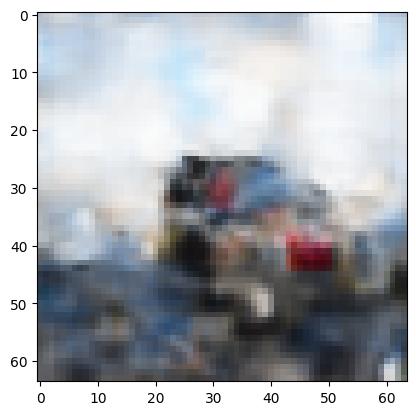

In [79]:
# encoding -= move_vector*3
sample_output = autoencoder.decoder(autoencoder.linear_before_decoder(encoding).view(1, 64, 8, 8))
#print((encoding - encoding2).pow(2).sum().sqrt())
plt.imshow(sample_output.detach().squeeze().permute(1,2,0))

tensor(0.) tensor(1.)
torch.Size([1, 3, 64, 64]) tensor(0.0026, grad_fn=<MseLossBackward0>)


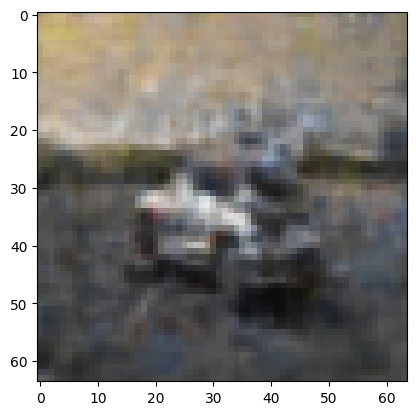

In [70]:
sample_input = next(iter(loader))[0]
print(sample_input.min(), sample_input.max())
sample_output = autoencoder(sample_input[0].unsqueeze(0))
print(sample_output.shape, mse(sample_output, sample_input[0].unsqueeze(0)))
plt.imshow(sample_output.detach().squeeze().permute(1,2,0))

In [89]:
losses = []
for epoch in range(100000):
    for batch_index, batch in enumerate(loader):
        moved = batch[0].to(DEVICE)

        output = autoencoder(moved)

        optimizer.zero_grad()
        loss = mse(output, moved)

        loss.backward()
        optimizer.step()

        losses.append(loss.item())
        if len(losses) > 100:
            losses.pop(0)

        avg_loss = sum(losses) / len(losses)

        print(epoch, batch_index, avg_loss, loss.item(), "                                                                                                          ", end='\r')

KeyboardInterrupt: 

In [85]:
torch.save(autoencoder, './trained/autoencoder_two_dim_embedding_on_512_images.pth')

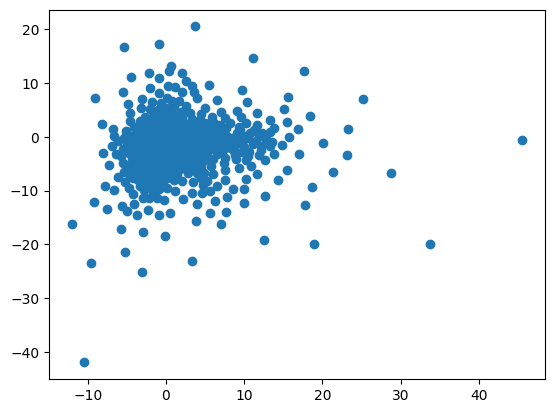

In [84]:
# plot distribution?

x = []
y = []

for i in range(len(dataset)):
    point = autoencoder.encoder(dataset[i][0].unsqueeze(0))[0]

    x.append(point[0].item())
    y.append(point[1].item())


plt.scatter(x, y)


In [11]:
from torchvision.transforms import transforms

In [ ]:
transforms.ToT

In [16]:
SAMPLES = 8 # squared
generated = []

totensor = transforms.ToTensor()
toimage = transforms.ToPILImage()

x_range = 10 - -7
y_range = 10 - -10
x_step = x_range / SAMPLES
y_step = y_range / SAMPLES
x_start = -7
y_start = -10

for i in range(SAMPLES):
    for j in range(SAMPLES):
        a = i * x_step + x_start
        b = j * y_step + y_start

        latent_vector = torch.tensor([a, b]).unsqueeze(0)

        gened = autoencoder.decoder(autoencoder.linear_before_decoder(latent_vector).view(64, 8, 8))

        generated.append(toimage(gened).resize((299, 299)))
print('done')

done


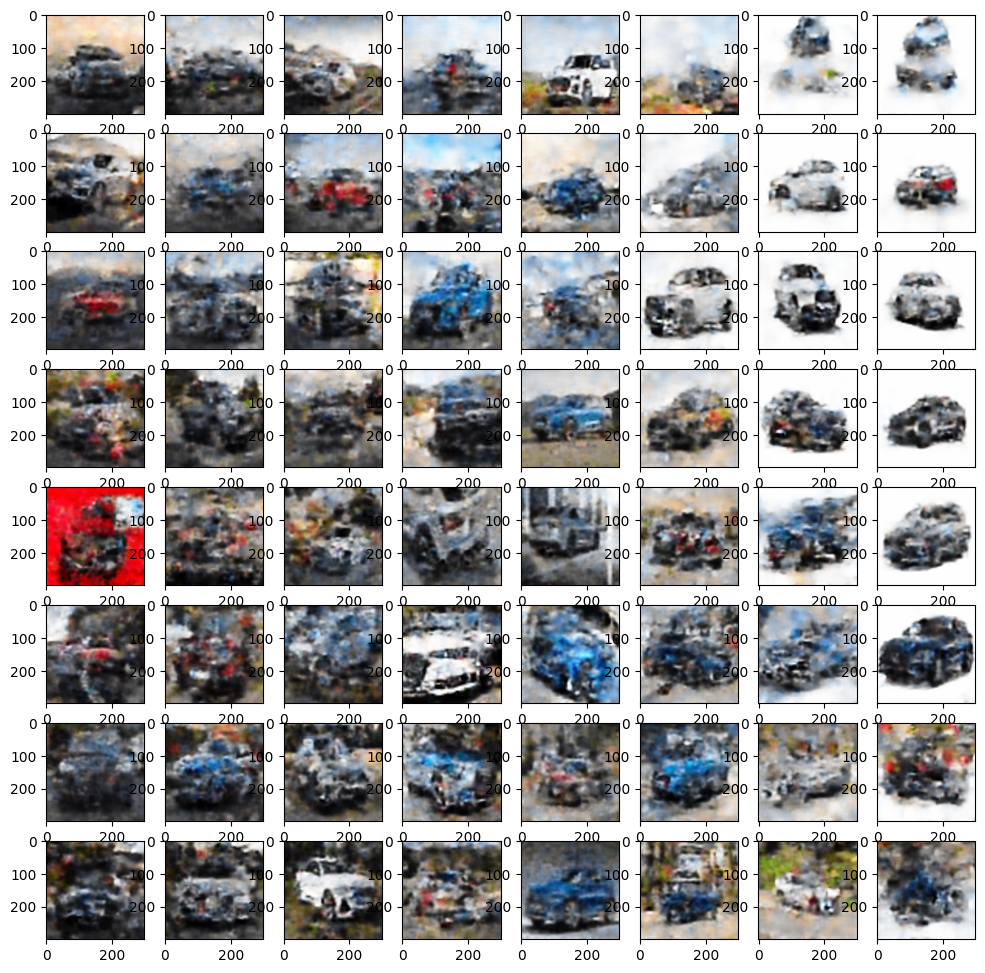

In [19]:
fig, axs = plt.subplots(8, 8, figsize=(12, 12))
for i in range(SAMPLES):
    for j in range(SAMPLES):
        axs[i][j].imshow(generated[i*8+j])